# Parameters

In [1]:
from IPython.display import Audio
from helpers.path_utils import get_base_dir
from helpers.transform import TrimAfterTrigger
from helpers.plot import plot_wavelet_spectrogram

base_dir = get_base_dir()
tat = TrimAfterTrigger()

STETHOSCOPE_AUDIO = "Eko Recording Sound Export 08_17_2024 3_00 PM.wav"
STETHOSCOPE_AUDIO = base_dir.joinpath("data", "digital", STETHOSCOPE_AUDIO)

MOBILE_AUDIO = "test-202408171500 (1).wav"
MOBILE_AUDIO = base_dir.joinpath("data", "mobile", MOBILE_AUDIO)

SYNTHETIC_FREQ = 300
DOWNSAMPLE_FACTOR = 400
SIGMA_SMOOTH = 7
PEAKS_HEIGHT = 0.3
PEAKS_PROMINENCE = 0.0001 

# Match records segments
Without the first and last segment

In [2]:
matched_records, sample_rate = tat.sync_records(
    mobile_dir=MOBILE_AUDIO,
    stethos_dir=STETHOSCOPE_AUDIO,
    synthetic_freq=SYNTHETIC_FREQ,
    downsample_factor=DOWNSAMPLE_FACTOR,
    sigma_smooth=SIGMA_SMOOTH,
    peaks_height=PEAKS_HEIGHT,
    peaks_prominence=PEAKS_PROMINENCE,
    trigger_duration=1.5,
    window=0.2
)

matched_records[0]

(tensor([-0.0005, -0.0005, -0.0004,  ...,  0.0334,  0.0340,  0.0336]),
 tensor([-0.0008, -0.0007, -0.0007,  ...,  0.0014,  0.0020,  0.0025]))

# Plot first segment

## from mobile

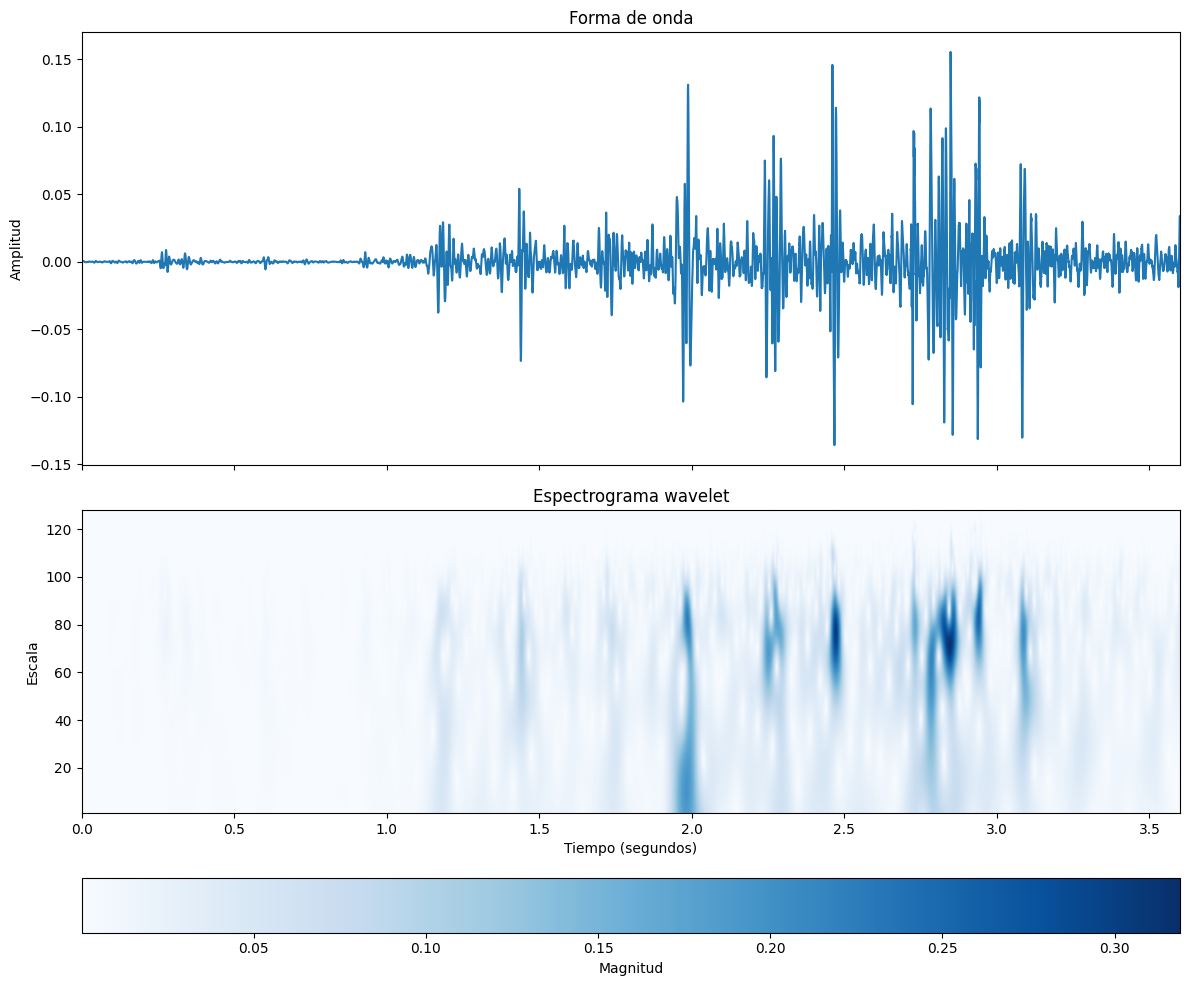

In [6]:
first_mobile_segment = matched_records[0][0]
plot_wavelet_spectrogram(first_mobile_segment, sample_rate, downsample_factor=1)
Audio(first_mobile_segment, rate=sample_rate, autoplay=True)

## from stethoscope

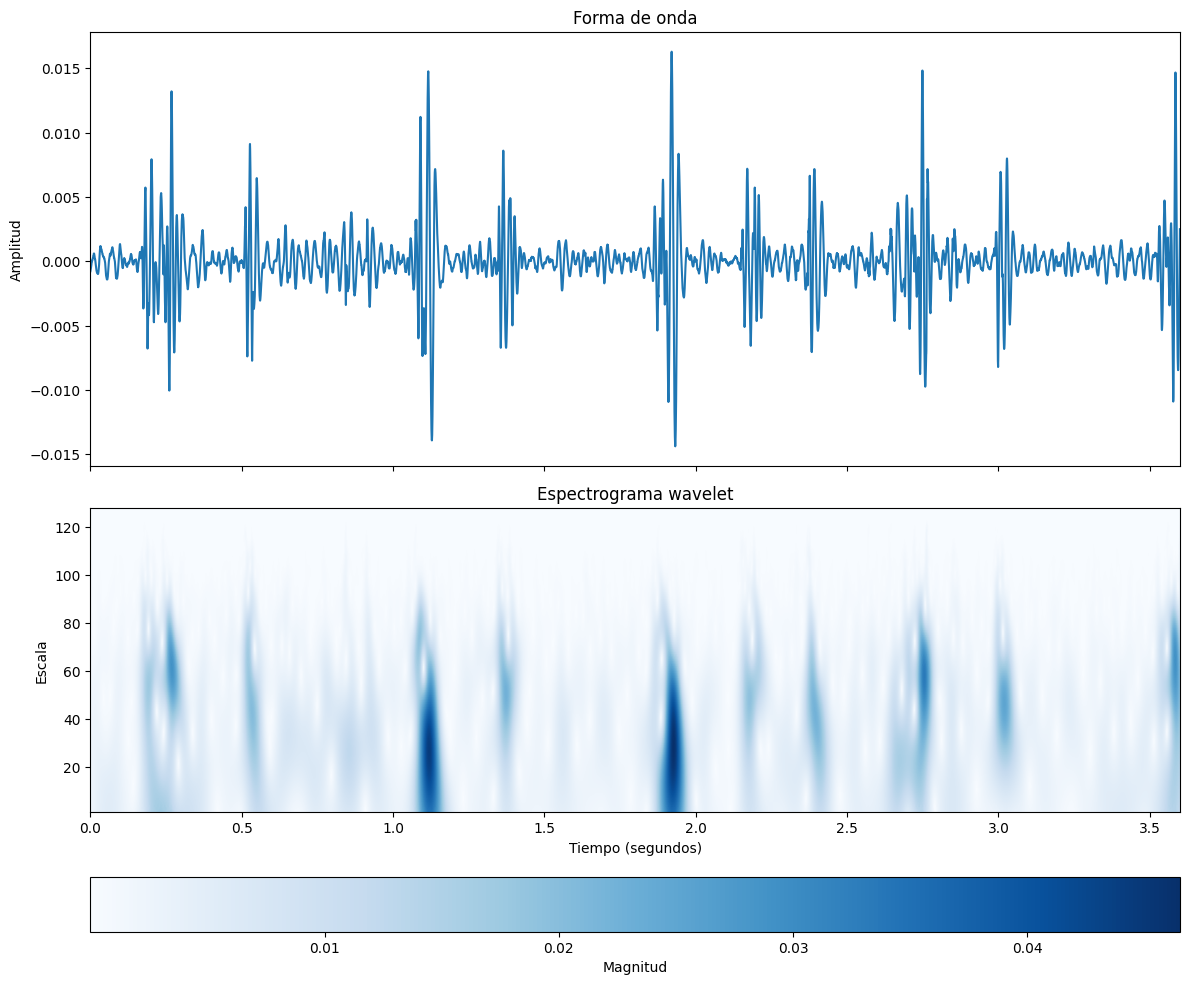

In [7]:
first_stethos_segment = matched_records[0][1]
plot_wavelet_spectrogram(first_stethos_segment, sample_rate, downsample_factor=1)
Audio(first_stethos_segment, rate=sample_rate, autoplay=True)

# Plot trigger

## from mobile

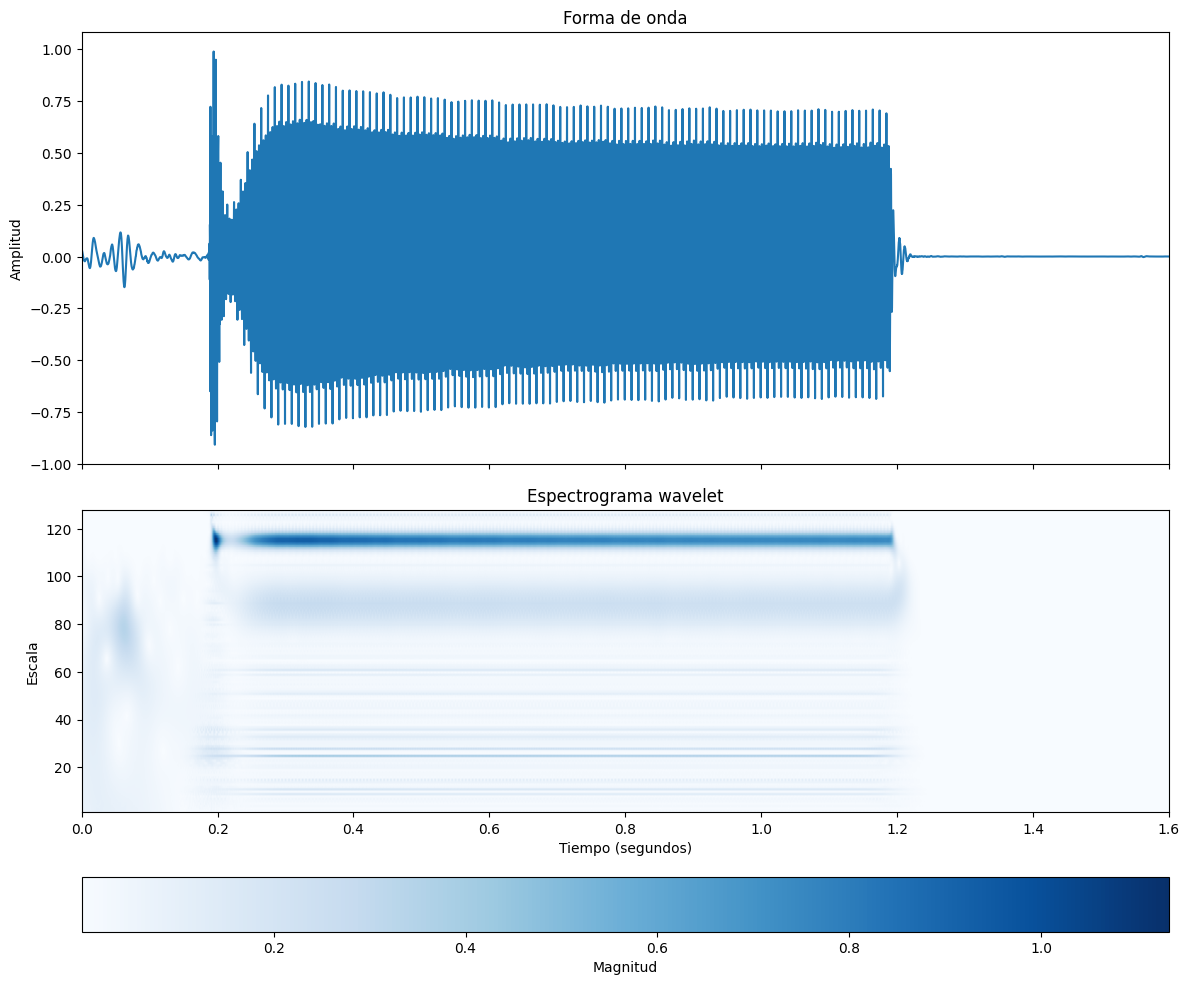

In [8]:
second_mobile_segment = matched_records[1][0]
plot_wavelet_spectrogram(second_mobile_segment, sample_rate, downsample_factor=1)
Audio(second_mobile_segment, rate=sample_rate, autoplay=True)

## from stethoscope

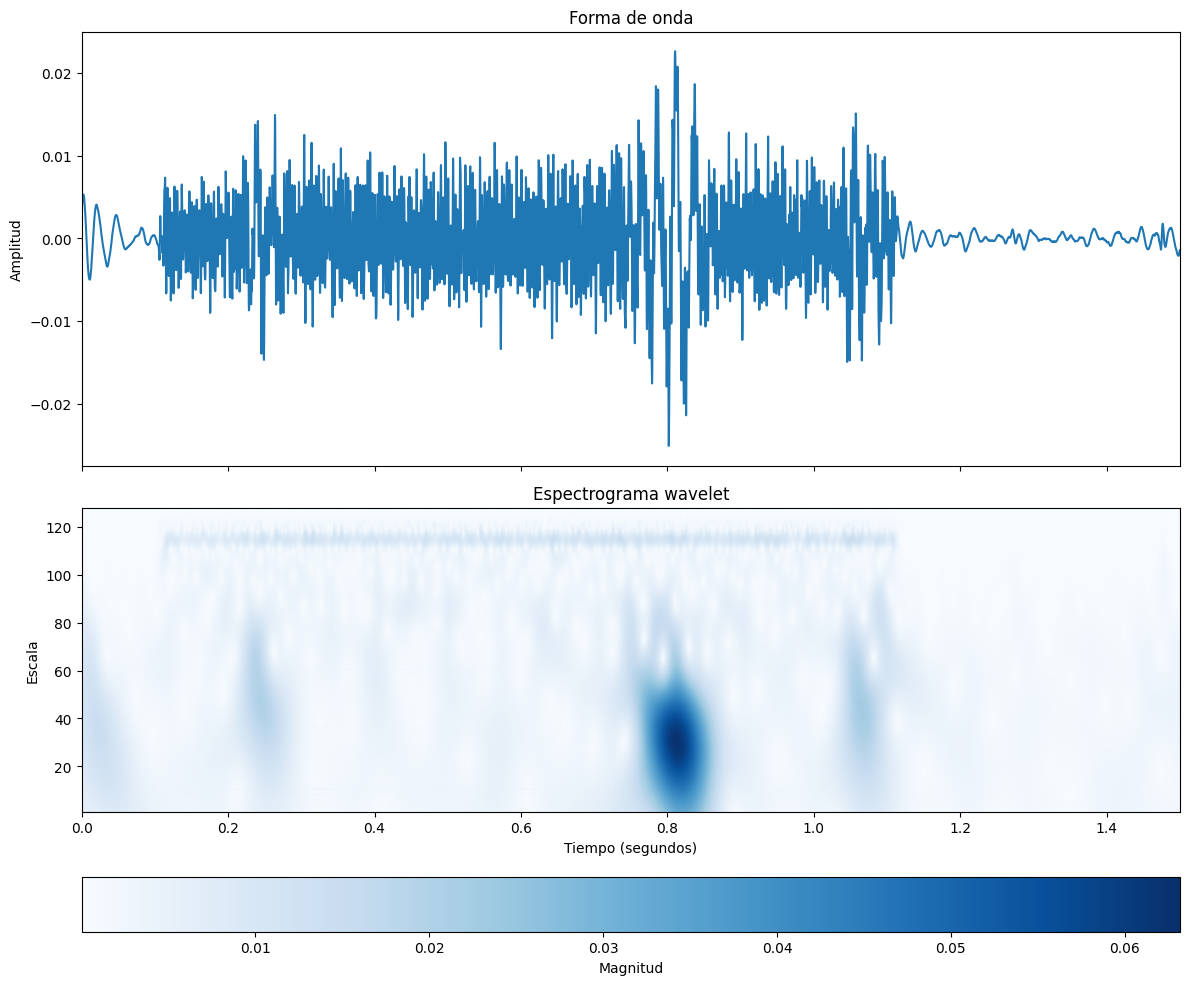

In [9]:
second_stethos_segment = matched_records[1][1]
plot_wavelet_spectrogram(second_stethos_segment, sample_rate, downsample_factor=1)
Audio(second_stethos_segment, rate=sample_rate, autoplay=True)